In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,least_squares,differential_evolution
!pip install pyswarm
from pyswarm import pso

In [95]:
k = np.arange(0,1001)
x = 3*k/1000

In [96]:
def func(x):
  return 1/(x**2-3*x+2)

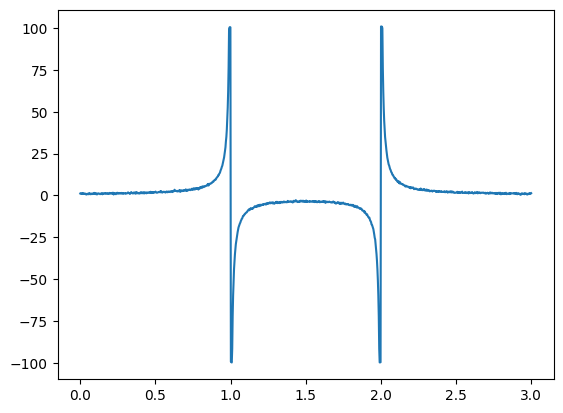

In [97]:
y=func(x)
np.random.seed(42)
for i in range(len(y)):
    if y[i] < -100:
        y[i] = -100 + np.random.normal(0.5,0.25)
    else:
        if y[i] > 100:
            y[i] = 100 + np.random.normal(0.5,0.25)
        else:
            y[i] += np.random.normal(0.5,0.25)
plt.plot(x,y)

In [98]:
def approx_func(x,a,b,c,d):
  return (a*x+b)/(x**2+c*x+d)

In [99]:
def least_sq(params,x,y):
  a,b,c,d=params
  return np.sum((approx_func(x,a,b,c,d)-y)**2)

In [100]:
epsilon = 0.001
max_iter = 1000
x0 = np.ones(4)

In [101]:
# Nelder-Mead
ans_nm = minimize(least_sq,x0, method='nelder-mead', args=(x, y), options={'maxiter': max_iter,'disp': True, 'fatol': epsilon})


Optimization terminated successfully.
         Current function value: 135558.246547
         Iterations: 321
         Function evaluations: 542


In [112]:
#Levenberg-Marquadt
def lm_func(params,x,y):
  a,b,c,d=params
  return approx_func(x,a,b,c,d)-y
ans_lm = least_squares(lm_func,x0,method='lm',ftol=epsilon,args=(x,y))
ans_lm

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.032e+00  2.158e+00 ... -1.379e+00 -1.583e+00]
           x: [-1.340e+00  1.228e+00  8.551e-01  3.891e-01]
        cost: 133320.07964371407
         jac: [[ 0.000e+00  2.570e+00  0.000e+00 -8.111e+00]
               [ 7.659e-03  2.553e+00 -2.393e-02 -7.978e+00]
               ...
               [ 2.511e-01  8.379e-02  5.865e-02  1.957e-02]
               [ 2.510e-01  8.365e-02  5.859e-02  1.953e-02]]
        grad: [ 1.322e+01  4.418e+01  6.561e+01 -3.339e+02]
  optimality: 333.85422543332254
 active_mask: [0 0 0 0]
        nfev: 16
        njev: None

In [ ]:
#Differential evolution
bounds = np.array([(-2,2),(-2,2),(-2,2),(-2,2)])
ans_de = differential_evolution(least_sq,bounds,args=(x,y),maxiter=max_iter,disp=True,x0=x0,tol=epsilon)


In [124]:
#Particle swarm method
lb = np.ones(4) * -3 #lower bound
ub = np.ones(4) * 3#upper bound
ans_pso, f = pso(least_sq, lb, ub, maxiter=1000, args=( x, y), swarmsize=1000, minfunc=epsilon)


Stopping search: Swarm best objective change less than 0.001


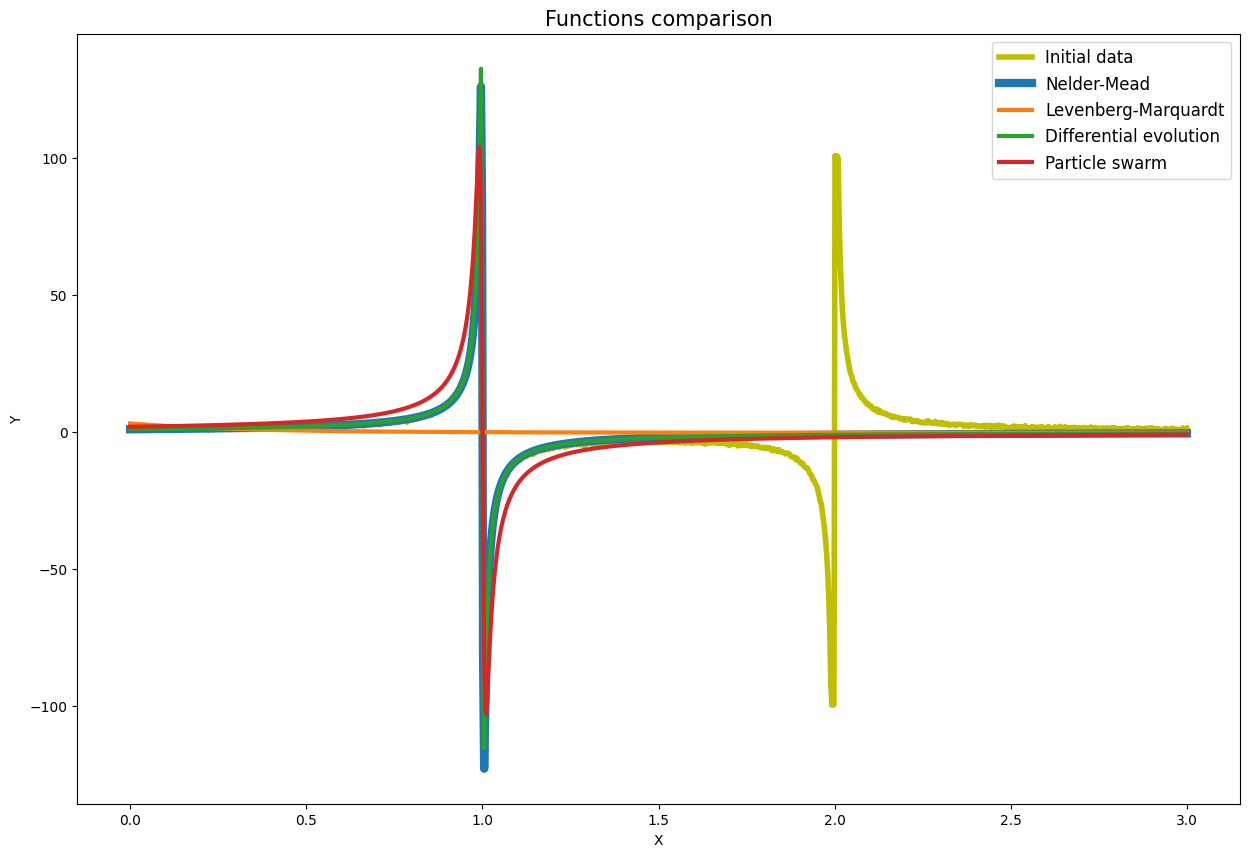

In [134]:
plt.figure(figsize=(15,10))
plt.title("Functions comparison", fontsize=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, color='y', label="Initial data",linewidth=4 )
plt.plot(x, approx_func(x, *ans_nm.x), label="Nelder-Mead",linewidth=6)
plt.plot(x, approx_func(x, *ans_lm.x), label="Levenberg-Marquardt",linewidth=3)
plt.plot(x, approx_func(x, *ans_de.x), label="Differential evolution",linewidth=3)
plt.plot(x, approx_func(x, *ans_pso), label="Particle swarm",linewidth=3)
plt.legend(fontsize=12)